# 3-point stick 

In this notebook, we will obtain bounds on the logarithmic Sobolev constant of the following Markov chain on 3 points, for $p\in(0,1/2)$.

<img src="img/3stick.png" width=500 />

The kernel of this chain is
$$ K = \begin{pmatrix}0&1&0\\p&0&1-p\\0&1&0 \end{pmatrix}.$$

In [1]:
using LogSobolevRelaxations
using SDPAFamily
using Plots
import IJulia

When $p$ is small, the problem is poorly condition. For this reason, we need a solver that is capable of solving SDPs using high-precision arithmetic.

We choose [SDPA-GMP](http://sdpa.sourceforge.net).

In [2]:
FEAS_TOL = 1e-9

function SDPA_GMPFactory()
    return SDPAFamily.Optimizer{Float64}(
        presolve = true,
        params = ( epsilonDash = FEAS_TOL, epsilonStar = FEAS_TOL)
        )
end

SDPA_GMPFactory (generic function with 1 method)

It remains to calculate lower and upper bounds on the log-Sobolev constant $\alpha(p)$ for a range of values of $p$. These are displayed graphically and saved in the vectors `α_lower` and `α_upper`.

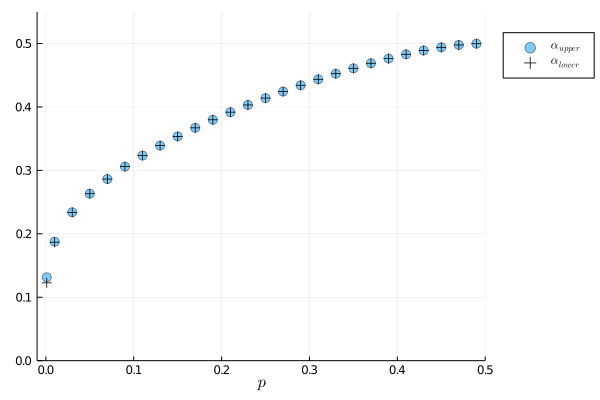

In [3]:
p = vcat([0.001], 0.01:0.02:0.49)
α_upper = Float64[]
α_lower = Float64[]

for i in 1:length(p)
    
    kernel = [0 1 0; p[i] 0 1-p[i]; 0 1 0]
    relaxation = default_relaxation(kernel)
    
    push!(α_lower, solve_relaxation!(relaxation, SDPA_GMPFactory; tol=0.0))
    push!(α_upper, get_upper_bound(relaxation, repeats=10)[2])
    
    IJulia.clear_output(true)
    plt = scatter(p[1:i], α_upper, markeralpha = 0.5, markersize = 5, 
                    markershape=:circle, label=raw"$\alpha_{upper}$",
                    ylim=(0,0.55), xlim=(-0.01,0.5), xlabel=raw"$p$", legend=:outertopright)
    plt = scatter!(plt, p[1:i], α_lower, markeralpha = 1, markersize = 5, markercolor="black",
                    markershape=:cross, label=raw"$\alpha_{lower}$") 
    IJulia.display(plt)
    
end